## FAKE NEWS CLASSIFICATION
---

In today’s digital age, misinformation has become a
major concern, particularly with the rapid spread of fake
news on platforms like social media, websites, and
other online sources. Misinformation can influence
public opinion, distort reality, compromise social
stability, and impact important decision-making
processes in areas like health, politics, and economics.
The challenge is exacerbated by the ease with which
false or misleading information can be shared and
amplified across digital networks.

The aim is to classify news articles/posts into real and fake categories based on textual content, providing a framework to combat misinformation and foster trust in digital information.

To address this growing issue, an automated system is required to detect and differentiate between real and fake news articles. The goal is to build a model capable of classifying news articles.

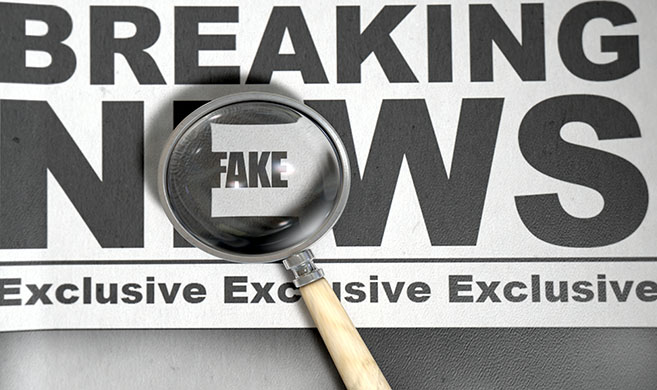

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  This notebook is dedicated for understanding and exploration of dataset.Here, I will perform Exploratory Data Analysis also.

# `Importing Libraries`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

import spacy
from spacy import displacy

import warnings
warnings.filterwarnings("ignore")

## Dataset Overview:
    Training Data: train.tsv
    Testing Data: test.tsv

1. Title: The headline of the article.
2. Text: This is the main content or body of the
  article, providing detailed information.
3. Subject: Acategorical attribute representing the general theme or topic of the article, such as politics, news, or government affairs.
4. Date: Represents when the article was published.
5. Label: Binary labels (0 or 1) indicate whether the article is fake or real news.(An article labeled 1 is considered real, while one labeled 0 is fake.)

# `Loading the Dataset`

In [ ]:
#Loading Training Data
train = pd.read_csv('/content/drive/MyDrive/Fake_News_Classification/Data/train.tsv', delimiter='\t')
train.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [ ]:
#Loading Testing Data
test = pd.read_csv('/content/drive/MyDrive/Fake_News_Classification/Data/test.tsv', delimiter='\t')
test.head()

,Unnamed: 0,title,text,subject,date,label
0,8104,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,7467,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,9473,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,276,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,19274,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0


In [ ]:
#Chechking Dimensions of data (no. of rows, no. of cols)
print(f"Training Dataset shape: {train.shape}")
print(f"Testing Dataset shape: {test.shape}")

Training Dataset shape: (30000, 6)
Testing Dataset shape: (8267, 6)


## `Data Exploration`

In [ ]:
#print concise summary and structure of training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8267 entries, 0 to 8266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8267 non-null   int64 
 1   title       8267 non-null   object
 2   text        8267 non-null   object
 3   subject     8267 non-null   object
 4   date        8267 non-null   object
 5   label       8267 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 387.6+ KB


Now, will only look into training data for now..

In [ ]:
train.describe(include='O')

,title,text,subject,date
count,30000,30000,30000,30000
unique,27149,27317,8,2381
top,Factbox: Trump fills top jobs for his administ...,Highlights for U.S. President Donald Trump’s a...,politicsNews,"December 6, 2017"
freq,9,6,7689,117


We can see that there are some duplicates in title and text. The data has more politicsNews.

## `Check for Missing Values`

In [ ]:
train.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
subject,0
date,0
label,0


Let's see one of the random text.

In [ ]:
#fake news
train.query('label == 0')['text'][29997]

'If there s one thing President Barack Obama isn t threatened by, it s Donald Trump.After the Brexit decision, in which the United Kingdom voted to leave the European Union, many Americans were left upset and afraid that what had happened overseas could be a sign that Trump might actually win the election. Trump himself has definitely played up those fears in his statements following the decision by making statements such as,  I really see a parallel between what is happening here and in the U.S.  and voters  will have the chance to re-declare their independence  in November. Luckily, Obama is setting the record straight.In an interview with NPR s Steve Inskeep, it was clear that Obama wanted Americans to know that there were distinct differences between America and Britain, and that the Brexit vote wasn t a warning about what might happen in November. In fact, Obama was confident enough to actually laugh when Inskeep asked him about Trump s statement that Americans will be able to rej

In [ ]:
#fake news
train.query('label == 0')['text'][6]

"Caleb Keeter, a lifelong proponent of the Second Amendment, and guitarist for Texas country outfit the Josh Abbott Band has had a strong change of heart regarding gun control. What changed his stance was  the events of last night  in which a gunman opened fire killing 58 people and injuring 515 others, marking it as the deadliest mass shooting in U.S. history. While  thoughts and prayers  are offered by the masses after each deadly shooting, Keeter took it a step further, posting a lengthy message on Twitter to express his personal thoughts after the attack.Keeter, who survived the attack, wrote,  I ve been a proponent of the 2nd amendment my entire life. Until the events of last night.   I cannot express how wrong I was. We actually have members of our crew with [Concealed Handgun Licenses], and legal firearms on the bus,  Keeter continued.  They were useless. We couldn t touch them for fear police might think we were part of the massacre and shoot us. A small group (or one man) laid

In [ ]:
#real news
train.query('label == 1')['text'][5]

'European Council President Donald Tusk appealed to Spanish Prime Minister Mariano Rajoy on Monday to seek ways to avoid escalation in Catalonia and the use of force following Sunday s independence referendum in the region. After speaking to Rajoy, Tusk tweeted:  Sharing his constitutional arguments, I appealed for finding ways to avoid further escalation and use of force.'

In [ ]:
#real news
train.query('label == 1')['text'][29995]

'The chief executive of the U.S. Aerospace Industries Association urged President-elect Donald Trump on Tuesday to quickly nominate new board members to the U.S. Export-Import Bank to allow the export financing agency to resume functioning. Dave Melcher said billions of dollars worth of potential orders were in limbo because the agency’s board lacked the necessary number of board members to back important trade deals. “The Senate can protect American manufacturing jobs by restoring the quorum to the Export-Import Bank’s board of directors,” Melcher said in a speech before more than 300 industry and media representatives Tuesday in Arlington, Virginia.  Boeing Co, one of the largest U.S. exporters, and other aerospace companies have raised similar concerns.'

I found some differences in tone, language, Attribution of Sources, Writing Style  etc..

Some Observations:
1. Emotional Tone and Language:
* Fake News: "Trump might want to sit down, and shut up,"
* Real News: Neutral and formal language, e.g., "Tusk appealed to Spanish Prime Minister Mariano Rajoy."

2.  Attribution of Sources
* Fake News: Vague or non-existent sourcing. For example, it references "Obama's interview below" and an image "via Pete Souza" but doesn't provide verifiable links or context.
* Real News: Explicitly attributes information to verifiable sources, e.g., "Tusk tweeted."

These are some of them but many other are there.

In [ ]:
#check for empty rows in text
empty_rows = train[train['text'].str.strip() == '']
if not empty_rows.empty:
    print("Empty rows found in the 'text' column:")
    print(empty_rows)
else:
    print("No empty rows in the 'text' column.")

No empty rows in the 'text' column.


In [ ]:
#check for empty rows in title
empty_rows = train[train['title'].str.strip() == '']
if not empty_rows.empty:
    print("Empty rows found in the 'title' column:")
    print(empty_rows)
else:
    print("No empty rows in the 'title' column.")

No empty rows in the 'title' column.


# `Exploratory Data Analysis (EDA)`

#### Analyze Class Distribution

In [ ]:
train['label'].value_counts()

,count
label,
0,15478
1,14522


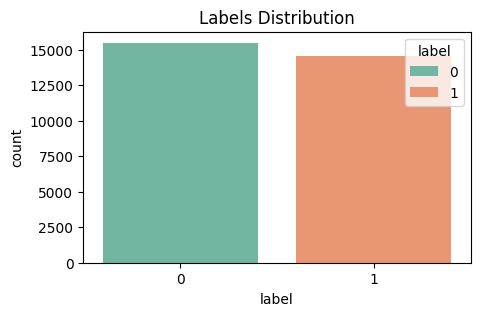

In [ ]:
#plotting bar plot for visulaization (Label 0: Fake, Label 1: Real)
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='label', hue='label', palette='Set2')
plt.title('Labels Distribution')
plt.show()

The classes are almost balanced with just the difference of 956.

#### Analyzing the Types of Subject

In [ ]:
train['subject'].value_counts()

,count
subject,
politicsNews,7689
worldnews,6833
News,6099
politics,4346
left-news,2953
Government News,1014
US_News,536
Middle-east,530


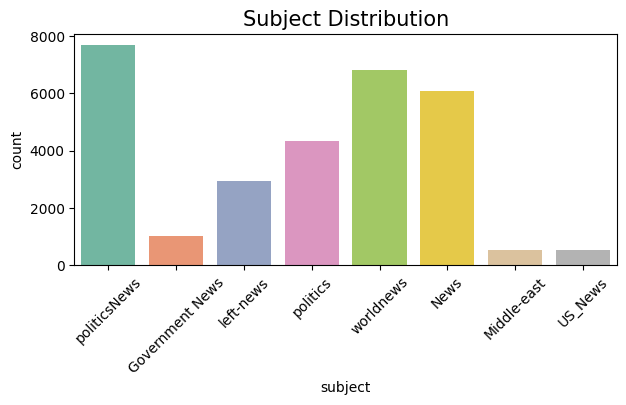

In [ ]:
#Plotting the visulization for better understanding the distribution
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x='subject', hue='subject', palette='Set2')
plt.title('Subject Distribution', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Checking for distribution of fake and real news in each subject.
news_count_by_subject = train.groupby(['label', 'subject']).size().reset_index(name='count')
news_count_by_subject
#Pivoting the table for easier reading
pivot_table = news_count_by_subject.pivot(index='subject', columns='label', values='count').fillna(0)
pivot_table

label,0,1
subject,,
Government News,1014.0,0.0
Middle-east,530.0,0.0
News,6099.0,0.0
US_News,536.0,0.0
left-news,2953.0,0.0
politics,4346.0,0.0
politicsNews,0.0,7689.0
worldnews,0.0,6833.0


### Insights:
* Subjects like "politicsNews" and "worldnews" contain only real news, as their Fake News count is 0
* Other subjects like "Government News", "Middle-east", "US_News", and "left-news" contain only fake news, as their Real News count is 0
* "News" and "politics" predominantly consist of fake news, as their real news counts are 0


### `Text and Title Length`

Let's now check for the length of articles/text in our dataset.

I will create the length column indicating the text and title length

In [ ]:
#Creating a new column title_length and text_length containing the lengths of each.
train['title_length'] = train['title'].apply(len)
train['text_length'] = train['text'].apply(len)

In [ ]:
train.head()

,Unnamed: 0,title,text,subject,date,label,title_length,text_length
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,67,2733
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,121,2630
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,64,4052
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,72,1131
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,104,1061


### Analyzing Text and Title Lengths of Fake and Real News Separately

In [ ]:
# Separating fake(label = 0) and real(label = 1) news
fake_news = train[train['label'] == 0]
real_news = train[train['label'] == 1]

In [ ]:
# Computing descriptive statistics
print("Fake News Statistics:")
print(fake_news[['title_length', 'text_length']].describe())

print("\nReal News Statistics:")
print(real_news[['title_length', 'text_length']].describe())

Fake News Statistics:
       title_length   text_length
count  15478.000000  15478.000000
mean      93.936426   2608.768381
std       27.400114   2572.249876
min        8.000000      5.000000
25%       77.000000   1499.000000
50%       89.000000   2187.500000
75%      105.000000   3047.000000
max      279.000000  51793.000000

Real News Statistics:
       title_length   text_length
count  14522.000000  14522.000000
mean      64.645366   2355.918675
std        9.115529   1675.725481
min       26.000000     45.000000
25%       59.000000    883.000000
50%       64.000000   2199.000000
75%       70.000000   3223.750000
max      133.000000  21535.000000


#### Key Observations:
1. Title Length:
* **Fake News titles are, on average, longer** (mean: ~94) **compared to Real News titles** (mean: ~65).
* The range for fake news titles is wider (8 to 279) than for real news titles (26 to 133), indicating more variability in fake news titles.

2. Text Length:
* **Fake News articles have slightly longer texts on average (2609) compared to Real News (2356)** However, fake news also shows significantly higher variability (std: ~2572 vs ~1676).

* The 25th percentile of fake news text length (1499) is much higher than that of real news (883), indicating that fake news articles are generally longer even in the lower range.


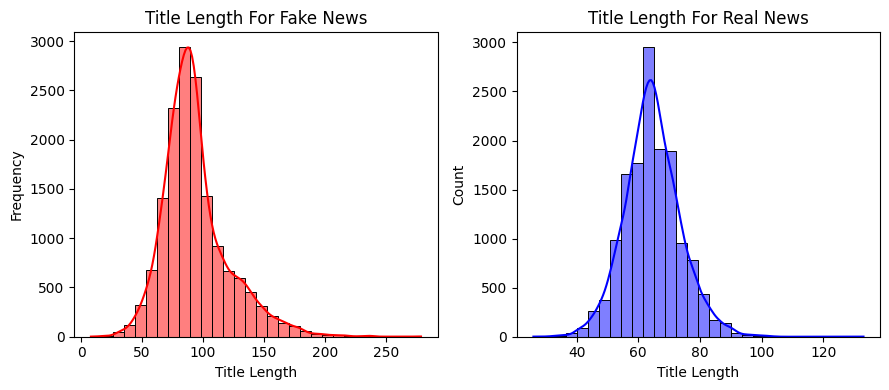

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Fake news Title Length
sns.histplot(fake_news['title_length'], bins=30, color='red', kde=True, ax=axes[0])
axes[0].set_title('Title Length For Fake News')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Frequency')

# Real News Title Length
sns.histplot(real_news['title_length'], bins=30, color='blue', kde=True, ax=axes[1])
axes[1].set_title('Title Length For Real News')
axes[1].set_xlabel('Title Length')

plt.tight_layout()
plt.show()

### Observation:
1. Fake News Titles: The distribution is wider, with longer titles. The peak is around 100 characters, and the length can go up to 250.

2. Real News Titles: The distribution is narrower, peaking at around 60 characters, with a much shorter maximum length.

Fake news tends to have longer titles compared to real news, which may reflect attempts to grab attention or add detail.

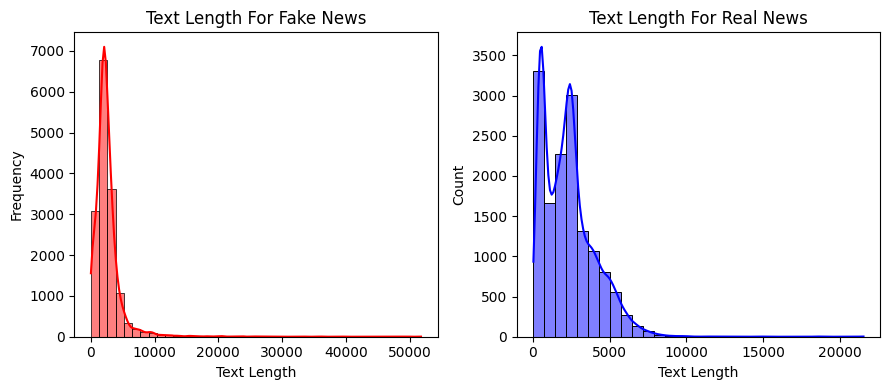

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Fake news Text Length
sns.histplot(fake_news['text_length'], bins=40, color='red', kde=True, ax=axes[0])
axes[0].set_title('Text Length For Fake News')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')

# Real News Text Length
sns.histplot(real_news['text_length'], bins=30, color='blue', kde=True, ax=axes[1])
axes[1].set_title('Text Length For Real News')
axes[1].set_xlabel('Text Length')

plt.tight_layout()
plt.show()

#### Observations:
1. Fake News Texts: Highly skewed with shorter lengths, most texts are under 10,000 characters, and the frequency drops rapidly for longer texts.

2. Real News Texts: More variation, with noticeable peaks at different lengths, generally longer than fake news on average.

Real news articles tend to have more detailed and varied lengths compared to fake news, which is usually shorter and less detailed.

# `Data Cleaning and Preprocessing`

## `Checking Duplicates `

In [ ]:
#checking duplicates count in each class
duplicate_class_counts = train[train.duplicated(subset=['title', 'text'])]['label'].value_counts()
print(duplicate_class_counts)

label
0    2571
1      99
Name: count, dtype: int64


The output indicates that among the duplicates, 2571 belong to the "fake" class (label 0) and 99 belong to the "real" class (label 1). This is important because it reveals that fake news is disproportionately duplicated in our dataset.

In [ ]:
duplicates = train[train.duplicated(subset=['title', 'text'], keep=False)]
duplicates_sorted = duplicates.sort_values(by='title')
duplicates_sorted[['text', 'title']]

,text,title
23720,Is anyone else thinking what we re thinking ab...,#Berkeley CRAZY! RIOTERS CHASE And Beat People...
10689,Is anyone else thinking what we re thinking ab...,#Berkeley CRAZY! RIOTERS CHASE And Beat People...
23112,Sanctioned domestic terrorists taking directio...,#BlackLivesMatter Terrorists Using #BlackRail ...
2933,Sanctioned domestic terrorists taking directio...,#BlackLivesMatter Terrorists Using #BlackRail ...
474,We ll wait for Nancy Pelosi to call this movem...,#BlackPrivilegedLives: Truth Behind The (Not S...
...,...,...
8588,Soros paid protesters who blocked streets and ...,“WHOSE STREETS?” NOT YOURS! NC Passes Law Shie...
18013,Watch the local news report as they explain wh...,“WOODY” KAINE One Of Six ARRESTED After Peacef...
9956,Watch the local news report as they explain wh...,“WOODY” KAINE One Of Six ARRESTED After Peacef...
28626,"No matter which candidate you support, this mo...",“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...


We can see that the consecutive rows have duplicates in title and text column.

Lets check if we have exact duplicates or near duplicates.


In [ ]:
duplicates_sorted[['text', 'title']]['title'][18013]

'“WOODY” KAINE One Of Six ARRESTED After Peaceful Pro-Trump Supporters Were Attacked By VIOLENT RIOTERS At MN State Capitol [VIDEO]'

In [ ]:
duplicates_sorted[['text', 'title']]['title'][9956]

'“WOODY” KAINE One Of Six ARRESTED After Peaceful Pro-Trump Supporters Were Attacked By VIOLENT RIOTERS At MN State Capitol [VIDEO]'

In [ ]:
duplicates_sorted[['text', 'title']]['title'][23112]

'#BlackLivesMatter Terrorists Using #BlackRail On Twitter To Organize Shut Down Of Rail Before MN Vikings Game'

In [ ]:
duplicates_sorted[['text', 'title']]['text'][23112]

'Sanctioned domestic terrorists taking direction from our Organizer In Chief and funding from his billionaire marxist friend, George Soros. Are there new laws about acts of terrorism and threats against Americans that we re unaware of? Since when did it become okay to threaten innocent people taking their families on a train to a football game with their radical behavior? Are we still in America? #BlackLivesMatter St. Paul is planning to shut down light rail before the Minnesota Vikings game on Sunday. This is a typical act for the group which often tries to disrupt traffic during specific events or rush hour.FOX 9 in Minneapolis reported: Black Lives Matter  plans to shut down light rail before Vikings  home openerThe group  Black Lives Matter Saint Paul  announced their plans on Facebook Thursday to shut down the light rail before the Vikings  home opener this Sunday. Sunday September 20th is the Minnesota Vikings  home opener, big money day, so what better day to shut the light rail

In [ ]:
duplicates_sorted[['text', 'title']]['title'][2933]

'#BlackLivesMatter Terrorists Using #BlackRail On Twitter To Organize Shut Down Of Rail Before MN Vikings Game'

In [ ]:
duplicates_sorted[['text', 'title']]['text'][2933]

'Sanctioned domestic terrorists taking direction from our Organizer In Chief and funding from his billionaire marxist friend, George Soros. Are there new laws about acts of terrorism and threats against Americans that we re unaware of? Since when did it become okay to threaten innocent people taking their families on a train to a football game with their radical behavior? Are we still in America? #BlackLivesMatter St. Paul is planning to shut down light rail before the Minnesota Vikings game on Sunday. This is a typical act for the group which often tries to disrupt traffic during specific events or rush hour.FOX 9 in Minneapolis reported: Black Lives Matter  plans to shut down light rail before Vikings  home openerThe group  Black Lives Matter Saint Paul  announced their plans on Facebook Thursday to shut down the light rail before the Vikings  home opener this Sunday. Sunday September 20th is the Minnesota Vikings  home opener, big money day, so what better day to shut the light rail

### Observation:

We have **`Exact Duplicates`** in our dataset. They add no new information and should generally be removed.

Also, duplicates disproportionately exist in one class, i.e class 0(Fake news) they should be removed to avoid bias.



## `Removing Duplicates`

For Droping rows we are only going to consider two primary features:
1. title
2. text

In [ ]:
#By default, Pandas keeps the first occurrence of a duplicate and removes the rest.
data = train.drop_duplicates(subset=['title', 'text'], keep='first', inplace=False)
#Reset the index after removing duplicates, to maintain the consistency.
data = data.reset_index(drop=True)

In [ ]:
# 30,000 - 2,670 = 27,330 rows
print(f"Dataset Shape after Remmoving Duplicates: ", data.shape)

Dataset Shape after Remmoving Duplicates:  (27330, 8)


In [ ]:
data.head()

,Unnamed: 0,title,text,subject,date,label,title_length,text_length
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,67,2733
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,121,2630
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,64,4052
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,72,1131
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,104,1061


In [ ]:
#check distribution of fake and real after removing duplicates
data['label'].value_counts()

,count
label,
1,14423
0,12907


## `Checking for articles with very less words`

In [ ]:
# Filter articles with less than 10 words.
short_articles = data[data['text'].apply(lambda article: len(article.split()) < 10) ]
# Display the count of such articles
print(f"Number of articles with less than 10 words: {len(short_articles)}")

Number of articles with less than 10 words: 121


In [ ]:
short_articles.head()

,Unnamed: 0,title,text,subject,date,label,title_length,text_length
864,11492,Judge Jeanine Gets to The Bottom of “Towergate...,https://www.youtube.com/watch?v=n9tfNMQpYWU,politics,"Mar 5, 2017",0,55,43
944,14148,HYSTERICAL! Jimmy Kimmel Reads “WINNERS AREN’T...,This is hysterical!Here s the entire interview:,politics,"Apr 8, 2016",0,78,47
1011,15214,(Video) Hilarious! Donald Trump on Jimmy Fallo...,Trump handles this in a great way! Pretty funny!,politics,"Sep 12, 2015",0,66,48
1188,16216,NEWT GINGRICH Punches Back At Democrats With M...,https://www.youtube.com/watch?v=PjeOoJyPNCk,Government News,"Mar 3, 2017",0,132,43
1201,15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,66,66


Let's look further deep into what text do they have in <= 10words.

In [ ]:
for i, text in enumerate(short_articles['text']):
  if(i == 20):
    break
  print(f"Text {i+1}: {text}\n")

Text 1: https://www.youtube.com/watch?v=n9tfNMQpYWU

Text 2: This is hysterical!Here s the entire interview:

Text 3: Trump handles this in a great way! Pretty funny!

Text 4: https://www.youtube.com/watch?v=PjeOoJyPNCk

Text 5: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg

Text 6: https://www.youtube.com/watch?time_continue=2&v=IjWClQcKhD8

Text 7: Ownage. pic.twitter.com/yznLKcYiMW  Paul Joseph Watson (@PrisonPlanet) January 7, 2017

Text 8: Hmmmm .interesting HT: U.S.Patriot1776 Via: Weasel Zippers

Text 9: Great interview!

Text 10: Yes, he did promise to support Donald Trump:

Text 11: Judge Jeanine rips into the Republican Establishment! Yes!

Text 12: https://www.youtube.com/watch?v=VkRCtn0nEvU

Text 13: Enjoy:

Text 14: BOOM! This meme says it all h/t Henry Payne

Text 15: Riiiight just  choose from what works

Text 16: Ouch!

Text 17: Spread this EVERYWHERE!

Text 18: You gotta love the socialist duck analogy

Text 19: https://www.youtube.com/watch?time_c

As we can see some text just contains link.

## `Counting Articles Containing Links Only`

Using ReGex to search for the pattern matching the link in entire data after removing duplicates.

In [ ]:
#pattern to match a link
link_pattern = r'^\s*(https?://\S+|www\.\S+)\s*$'
# Counting the number of articles/text containing only links
articles_with_only_links = data['text'].apply(lambda x: bool(re.fullmatch(link_pattern, x.strip()))).sum()
print(f"Number of text containing only links: {articles_with_only_links}")

Number of text containing only links: 40


These short texts, especially those containing only links or minimal information, are not typically useful for analysis or modeling, especially for tasks like fake news detection.

Since they don't provide meaningful context or features for a model, the simplest option is to drop them.

## `Removing text containing only links OR Word counts < 10`

Here, I used the threshold as 10 words because the dataset was not vast and I also observed that the articles are usually not very long, which it is supposed to be. So, with this dataset we can proceed with low threshold but for large dataset with long articles a much longer value can be used.

In [ ]:
# Function to check if text contains primarily a link or minimal content
def contains_only_links_or_minimal(text):
  link_pattern = r'^\s*(https?://\S+|www\.\S+)\s*$'
  return bool(re.fullmatch(link_pattern, text.strip())) or len(text.split()) < 10

# Filter out such rows
data = data[~data['text'].apply(contains_only_links_or_minimal)]

In [ ]:
print(f"Dataset shape after removing link-only or minimal-content rows: {data.shape}")

Dataset shape after removing link-only or minimal-content rows: (27209, 8)


In [ ]:
#Again checking distribution of fake and real
data['label'].value_counts()

,count
label,
1,14422
0,12787


Note: This distribution is slightly imbalanced, but it's not extreme. We can monitor performance on both classes using proper metrics like precision, recall, F1-score and ROC-AUC.

We can also adjust the loss function to assign higher importance to the minority class during training.

## `Merging Title and Text`

Now, I will merge the title and text columns int one column so that the model takes into account the both for training.

In [ ]:
data['full_text'] = data['title'] + " " + data['text']

In [ ]:
data.head()

,Unnamed: 0,title,text,subject,date,label,title_length,text_length,full_text
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,67,2733,Ex-CIA head says Trump remarks on Russia inter...
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,121,2630,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,64,4052,Federal Reserve governor Powell's policy views...
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,72,1131,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,104,1061,NANCY PELOSI ARROGANTLY DISMISSES Questions on...


In [ ]:
data.iloc[1457]['label']

0

In [ ]:
#Inspecting a random full_text
data.iloc[1457]['full_text']

'WALMART Is Selling “Made In Mexico” Apparel Featuring Domestic Terror Group [VIDEO] The domestic terror group, Antifa, has been around for a while, but since Donald Trump s inauguration in January, they ve become more visible and increasingly more violent. Well, good news for Americans who support violent, masked, molotov cocktail throwing, ax and hammer-wielding punks, who run through major cities in packs, busting out windows, setting fire to vehicles, and pretty much destroying anything or anyone in their path, as a way to show their  resistance  to a Donald Trump presidency, Walmart now offers a line of  Antifa  apparel for you. If you re struggling to find the perfect gift for your violent, snot-nosed, anti-Trump student, or unemployed basement dweller in your family this holiday season, you can find it online at Walmart. Walmart is selling  Antifa  clothing that  will [allow you to] express yourself inside the opposition to the ideology, organizations, governments, and people fr

# `Advanced EDA Techniques `
Exploring Text and Title columns more for better understanding data.

In [ ]:
#Create a duplicate of data
data_duplicate = data.copy()
print(f"Shape:{data_duplicate.shape}")

Shape:(27209, 9)


In [ ]:
data_duplicate.head(2)

,Unnamed: 0,title,text,subject,date,label,title_length,text_length,full_text
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,67,2733,Ex-CIA head says Trump remarks on Russia inter...
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,121,2630,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...


In [ ]:
data_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27209 entries, 0 to 27329
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    27209 non-null  int64 
 1   title         27209 non-null  object
 2   text          27209 non-null  object
 3   subject       27209 non-null  object
 4   date          27209 non-null  object
 5   label         27209 non-null  int64 
 6   title_length  27209 non-null  int64 
 7   text_length   27209 non-null  int64 
 8   full_text     27209 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


# `Exploring NER (Named Entity Recognition): `

Will perform NER before cleaning text as Text cleaning often involves removing punctuation, special characters, or converting text to lowercase. This can strip entities of their proper context and make them harder to recognize.
Preprocessing steps like stemming or lemmatization can reduce their performance.



For example, "U.S.A." might be cleaned to "usa," making it less recognizable as a proper noun.

**Named entity recognition (NER)** — sometimes referred to as entity chunking, extraction, or identification — is the task of identifying and categorizing key information (entities) in text.

An entity can be any word or series of words that consistently refers to the same thing. Every detected entity is classified into a predetermined category.

How NER works:

At the heart of any NER model is a two step process:
1.	Detect a named entity
2.	Categorize the entity


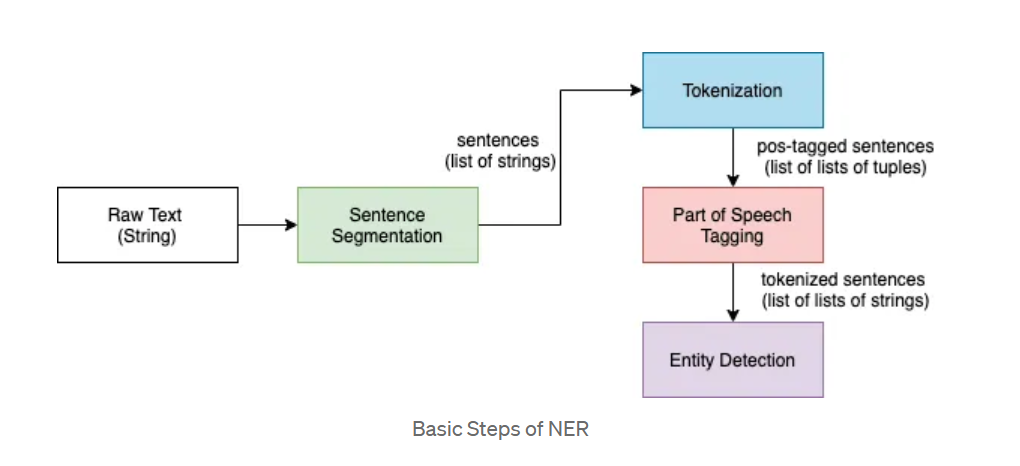

## **`NER with spaCy`**

spaCy offers pre-trained NER models for multiple languages.

spaCy’s Statistical Model - **en_core_web_md**: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Size – 91 MB

In [ ]:
# Run this to Install the medium(md) Model
#!python -m spacy download en_core_web_md

In [ ]:
#Loading spacy english model
nlp = spacy.load('en_core_web_md')

Demonstrating a simple example who ner works.

In [ ]:
# Example text
text = "Elon Musk founded SpaceX in California in 2002."

# Process the text
doc = nlp(text)              # Here, nlp is the object of the model loaded..

# Extract named entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Elon Musk PERSON
SpaceX ORG
California GPE
2002 DATE


In SpaCy, GPE stands for "Geo-Political Entity". It is a named entity label used to identify geopolitical entities, such as countries, cities, and states.

In [ ]:
# Function to extract named entities for news title
def extract_entities(title):
  doc = nlp(title)
  html = displacy.render(doc, style="ent", jupyter=True)

# Applying the function to the first few titles
for index, title in enumerate(data_duplicate['title']):
  if(index == 9):
    break
  print(f"Title: {title}")
  extract_entities(title)
  print("\n")

Title: Ex-CIA head says Trump remarks on Russia interference 'disgraceful'




Title: YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STORE OWNER Swindles Tax Payers Out Of $1,116,924.27 In Latest Food Stamp Scam




Title: Federal Reserve governor Powell's policy views, in his own words




Title: SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks” Campaign…Desperate Move!




Title: NANCY PELOSI ARROGANTLY DISMISSES Questions on Crooked Democrat IT Employees Under Investigation [Video]




Title: EU's Tusk appealed to Rajoy to avoid escalation in Catalonia




Title: Country Guitarist Who Survived Vegas Shooting Changes Mind On Gun Control: ‘How Wrong I Was’




Title: Clinton says 'there is no case here' in FBI email investigation




Title: ABC NEWS REPORTS: Las Vegas Massacre Suspect’s Hard Drive Is MISSING From His Laptop


Now Let's look into one of the articles.

In [ ]:
article = data_duplicate.iloc[150]['text']
doc = nlp(article)
html = displacy.render(doc, style="ent", jupyter=True)

Well it has identified a good number of entities as you can see from the text above.

## `Inspecting Top Entities`

In [ ]:
#Some common Entities identified by spacy
common_entities = ['PERSON', 'NORP', 'ORG', 'GPE', 'LOC',
                   'EVENT', 'LAW', 'LANGUAGE', 'DATE', 'CARDINAL', 'PRODUCT']

# Extracting all named entities from the full_text column
all_entities = []
for text in data_duplicate['full_text']:
  doc = nlp(text)
  all_entities.extend([ent.text for ent in doc.ents if ent.label_ in common_entities ])

# Count the most common entities
entity_counts = Counter(all_entities).most_common(15)

In [ ]:
#Some common Entities identified by spacy
common_entities = ['PERSON', 'NORP', 'ORG', 'GPE', 'LOC',
                   'EVENT', 'LAW', 'LANGUAGE', 'DATE', 'CARDINAL', 'PRODUCT']

# Extracting entities with their labels
entity_data = []

for text in data_duplicate['full_text']:
    doc = nlp(text)
    entity_data.extend([ (ent.text, ent.label_) for ent in doc.ents if ent.label_ in common_entities])

# Creating a DataFrame with columns "Entity_Text" and "Entity_Label"
entity_df = pd.DataFrame(entity_data, columns=["Entity_Text", "Entity_Label"])

In [ ]:
entity_df.head()

,Entity_Text,Entity_Label
0,Ex-CIA,ORG
1,Trump,PERSON
2,Russia,GPE
3,CIA,ORG
4,John Brennan,PERSON


In [ ]:
label_counts = entity_df["Entity_Label"].value_counts()
label_counts

,count
Entity_Label,
PERSON,335316
ORG,249396
GPE,227692
DATE,170606
NORP,128507
CARDINAL,79131
LOC,12590
EVENT,4702
PRODUCT,4458


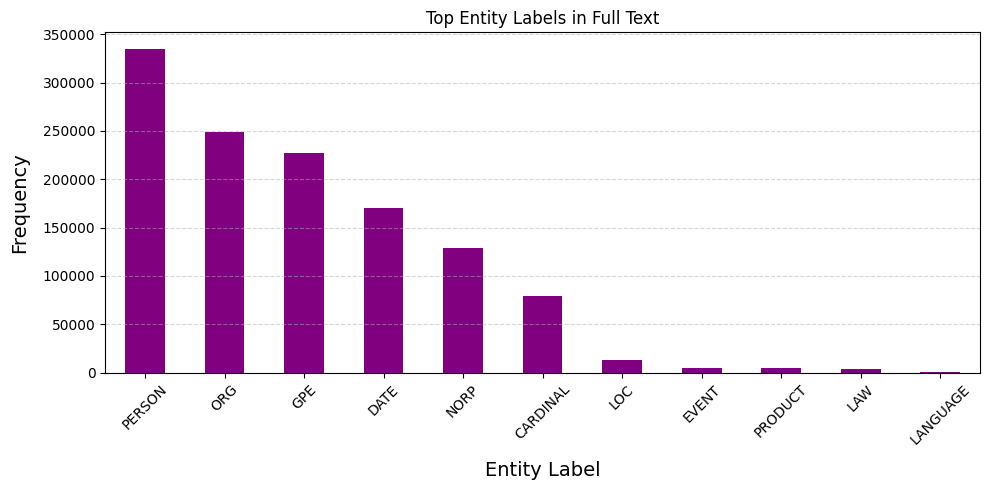

In [ ]:
#Plot the labels/entities
label_counts.plot(kind="bar", figsize=(10, 5), color="purple")
plt.title("Top Entity Labels in Full Text")
plt.xlabel("Entity Label", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

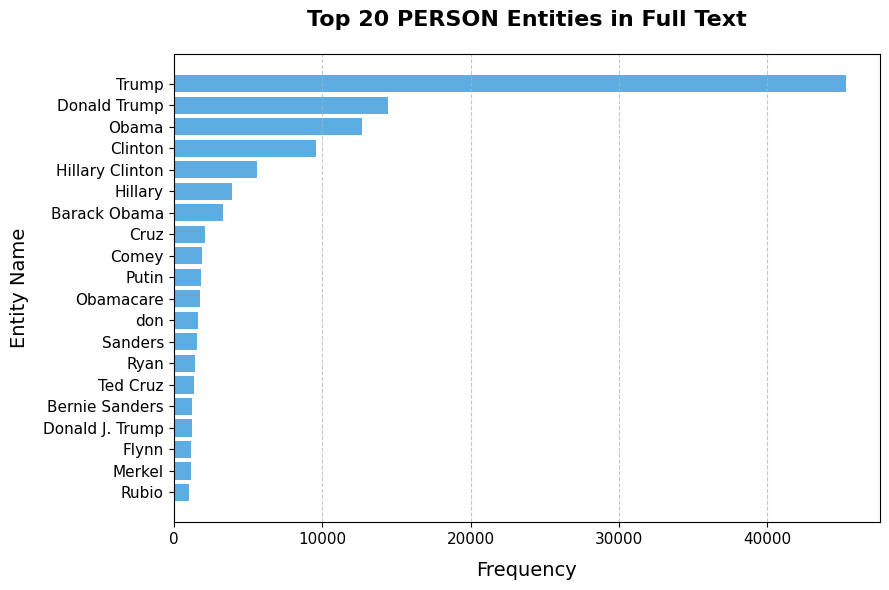

In [ ]:
person = entity_df[entity_df['Entity_Label'] == 'PERSON']

# Counting the most frequent PERSON entities
top_20_persons = Counter(person['Entity_Text']).most_common(20)

# Extracting entity names and their counts for the plot
person_names, person_counts = zip(*top_20_persons)

# Plotting
plt.figure(figsize=(9, 6))
plt.barh(person_names, person_counts, color="#5DADE2")

plt.title("Top 20 PERSON Entities in Full Text", fontsize=16, weight='bold', pad=20)
plt.xlabel("Frequency", fontsize=14, labelpad=10)
plt.ylabel("Entity Name", fontsize=14, labelpad=10)
plt.gca().invert_yaxis()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

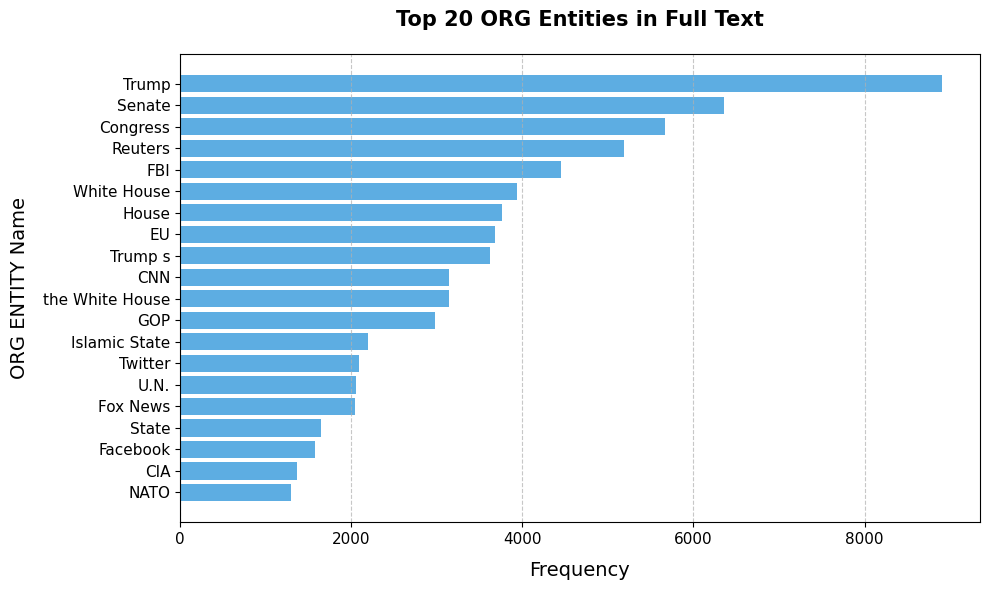

In [ ]:
org = entity_df[entity_df['Entity_Label'] == 'ORG']

# Counting the most frequent ORG entities
top_20_org = Counter(org['Entity_Text']).most_common(20)

# Extracting entity names and their counts for the plot
org_names, org_counts = zip(*top_20_org)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(org_names, org_counts, color="#5DADE2")

plt.title("Top 20 ORG Entities in Full Text", fontsize=15, weight='bold', pad=20)
plt.xlabel("Frequency", fontsize=14, labelpad=10)
plt.ylabel("ORG ENTITY Name", fontsize=14, labelpad=10)
plt.gca().invert_yaxis()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

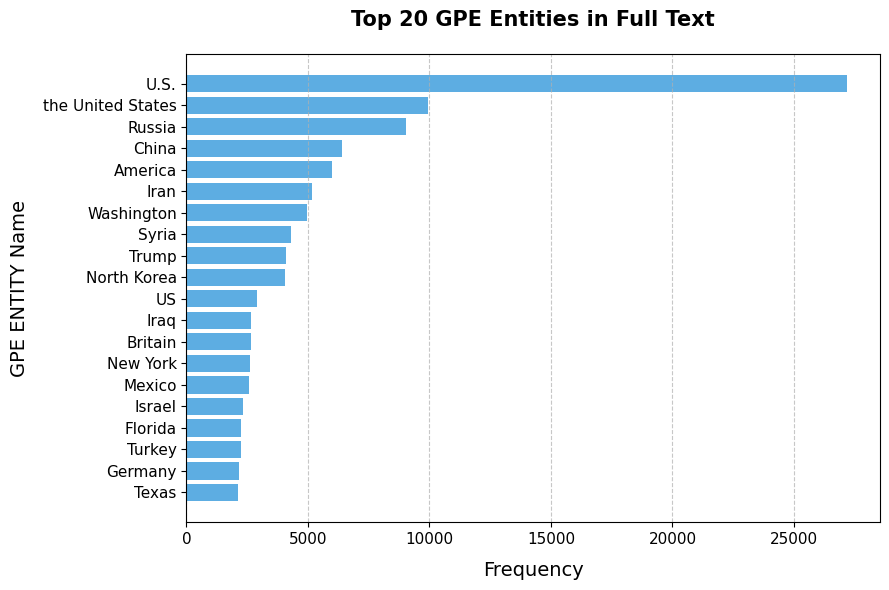

In [ ]:
gpe = entity_df[entity_df['Entity_Label'] == 'GPE']

# Counting the most frequent GPE entities
top_20_gpe = Counter(gpe['Entity_Text']).most_common(20)

# Extracting entity names and their counts for the plot
gpe_names, gpe_counts = zip(*top_20_gpe)

# Plotting
plt.figure(figsize=(9, 6))
plt.barh(gpe_names, gpe_counts, color="#5DADE2")

plt.title("Top 20 GPE Entities in Full Text", fontsize=15, weight='bold', pad=20)
plt.xlabel("Frequency", fontsize=14, labelpad=10)
plt.ylabel("GPE ENTITY Name", fontsize=14, labelpad=10)
plt.gca().invert_yaxis()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

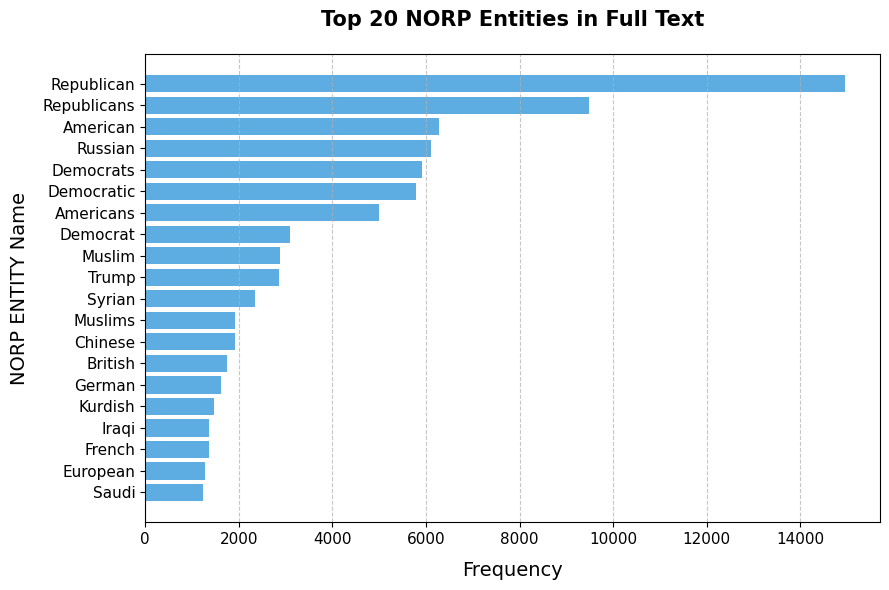

In [ ]:
norp = entity_df[entity_df['Entity_Label'] == 'NORP']

# Counting the most frequent NORP entities
top_20_norp = Counter(norp['Entity_Text']).most_common(20)

# Extracting entity names and their counts for the plot
norp_names, norp_counts = zip(*top_20_norp)

# Plotting
plt.figure(figsize=(9, 6))
plt.barh(norp_names, norp_counts, color="#5DADE2")

plt.title("Top 20 NORP Entities in Full Text", fontsize=15, weight='bold', pad=20)
plt.xlabel("Frequency", fontsize=14, labelpad=10)
plt.ylabel("NORP ENTITY Name", fontsize=14, labelpad=10)
plt.gca().invert_yaxis()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Saving the dataframe and will use this to clean the text and create text reprentation for models.

In [ ]:
data.to_csv("/content/drive/MyDrive/Fake_News_Classification/Data/titles_text_combined.csv", index=False)